In [1]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [2]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input,test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input,maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [6]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Embedding(500,16,input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [7]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss="binary_crossentropy",metrics=["accuracy"])

In [8]:
cp = keras.callbacks.ModelCheckpoint('best-lstm.h5',save_best_only=True)
es = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [9]:
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target),callbacks=[cp,es])

Epoch 1/100
313/313 [==============================] - 11s 10ms/step - loss: 0.6929 - accuracy: 0.5323 - val_loss: 0.6925 - val_accuracy: 0.5726
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6919 - accuracy: 0.5972 - val_loss: 0.6912 - val_accuracy: 0.6094
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6898 - accuracy: 0.6294 - val_loss: 0.6882 - val_accuracy: 0.6416
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6836 - accuracy: 0.6403 - val_loss: 0.6748 - val_accuracy: 0.6042
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6516 - accuracy: 0.6451 - val_loss: 0.6272 - val_accuracy: 0.7228
Epoch 6/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6135 - accuracy: 0.7420 - val_loss: 0.6022 - val_accuracy: 0.7450
Epoch 7/100
313/313 [==============================] - 3s 11ms/step - loss: 0.5929 - accuracy: 0.7517 - val_loss: 0.5874 - val_accuracy: 0.

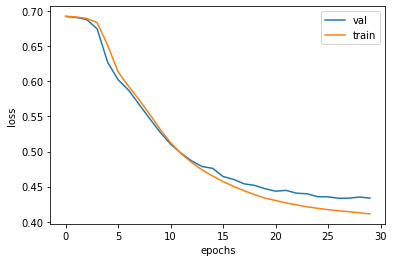

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['val','train'])
plt.show()